### Hepatitis Dataset Classification in Python

Korišćen dataset <a href="http://archive.ics.uci.edu/ml/datasets/Hepatitis?fbclid=IwAR1qzvzODcaRh2dLE5u2bf8LYA-7cronNAUlx2ifJfK8eBEWPqg2zOibXIQ">Hepatitis UCI MLR</a> sadrži 155 instanci, 19 atributa od kojih prva kolona označava klasu da li će ispitanik preživeti ili ne, na osnovu ostalih podataka iz dataset-a.
Citation:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [50]:
# Data preprocessing
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp

In [51]:
# Importing the Dataset 
dataset = pd.read_csv('hepatitis.data')

In [52]:
dataset

,1. Class,2. AGE,3. SEX,4. STEROID,5. ANTIVIRALS,6. FATIGUE,7. MALAISE,8. ANOREXIA,9. LIVER BIG,10. LIVER FIRM,11. SPLEEN PALPABLE,12. SPIDERS,13. ASCITES,14. VARICES,15. BILIRUBIN,16. ALK PHOSPHATE,17. SGOT,18. ALBUMIN,19. PROTIME,20. HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


Pošto dataset nije dobro balansiran, isprobane su dve metode: Upsampling i Undersampling. 
Undersampling metoda u kojoj se uzimaju 32 slučaja od maksimalno 32 u kojima je ispitanik preminuo, a od 123 preostalih slučajeva kada je ispitanik preživeo uzimaju se samo 32 instance dovela je do lošijih rezultata zbog umanjenog skupa podataka koji obrađuje algoritam. Novi dataset u ovom slučaju ima 64 umesto originalnih 155 instanci, a preciznost na kraju obrade iznosila je između 68,75% i 81,25%.
Za isprobanu metodu Upsampling, rezultat preciznosti predikcije u procentima iznosio je 90,32%, a kod je prikazan u nastavku.

In [53]:
died = dataset[dataset['1. Class'] == 1] 
lived = dataset[dataset['1. Class'] == 2]
non_normalized_dataset = dataset
from sklearn.utils import resample
died_upsampled = resample(died, replace=True,  n_samples=123, random_state=10)
dataset = pd.concat([died_upsampled, lived])

featureMatrix_Independent predstavlja podatke izdvojene iz dataset-a koji se odnose na nezavisne atribute

variableVector_Dependent predstavlja podatke iz prve kolone dataset-a koji označavaju da li je ispitanik preživeo ili ne

In [54]:
featureMatrix_Independent = dataset.iloc[:, 1:20].values
variableVector_Dependent = dataset.iloc[:, 0].values

U nastavku se obrađuje dataset kako bi se uklonili podaci koji nedostaju. Pokazalo se da je od izbora strategije mean, most_frequent i median - most_frequent najbolji izbor. Obrađuje se samo matrica nezavisnih podataka i to kolone u kojima postoje '?' umesto konkretnog podatka.

In [55]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = '?', strategy = 'most_frequent')
imputer.fit(featureMatrix_Independent[:, 2:20])
featureMatrix_Independent[:, 2:20] = imputer.transform(featureMatrix_Independent[:, 2:20])

U narednom delu deklarišu se i inicijalizuju promenljive F_train, D_train (trening podaci nezavisnih i zavisne promenljive) i F_test i D_test (podaci za testiranje nezavisnih i zavisne promenljive), uzima se 25% dataset-a za skup podataka za testiranje.

In [56]:
# Creating Test Set and Training Set from Dataset
from sklearn.model_selection import train_test_split
F_train, F_test, D_train, D_test = train_test_split(featureMatrix_Independent, variableVector_Dependent, test_size = 0.25, random_state = 0)

Kao što smo mogli primetiti u dataset-u atributi su prikazani vrednostima u različitim opsezima. Ovo može uticati na algoritam i određeni atributi sa velikim vrednostima mogu postati dominantni. Zbog toga je neophodno odraditi skaliranje, upotrebom StandardScaler-a. 

In [57]:
# Feature scaling for independent features
from sklearn.preprocessing import StandardScaler
scale_F = StandardScaler()
F_train = scale_F.fit_transform(F_train)
F_test = scale_F.transform(F_test)

In [58]:
F_test

array([[ 0.35752098, -0.23973165,  1.14017543, ..., -1.34742913,
        -0.66571715,  0.76564149],
       [ 0.35752098, -0.23973165,  1.14017543, ...,  0.88363462,
         1.07281426,  0.76564149],
       [ 1.33814997, -0.23973165, -0.87705802, ...,  0.04698572,
        -0.31801087,  0.76564149],
       ...,
       [-0.78654617, -0.23973165, -0.87705802, ..., -0.78966319,
        -0.66571715,  0.76564149],
       [ 0.35752098, -0.23973165,  1.14017543, ...,  0.88363462,
         1.07281426,  0.76564149],
       [-1.60373699, -0.23973165,  1.14017543, ...,  1.44140056,
        -0.66571715, -1.30609431]])

U nastavku se koristi ExtraTreesClassifier kako bismo odredili važnost udela atributa u analizi i predikciji.
U rezultatu vidimo da su prva dva atributa (18 i 5) histology i malaise dominantni pri predikciji, ali i neki od narednih mogu doprineti treniranju i predikciji.

Feature ranking:
1. feature 18 (0.114499)
2. feature 5 (0.109938)
3. feature 10 (0.082404)
4. feature 13 (0.080934)
5. feature 11 (0.073410)
6. feature 16 (0.061029)
7. feature 17 (0.052287)
8. feature 0 (0.050669)
9. feature 12 (0.049746)
10. feature 14 (0.049134)
11. feature 15 (0.043197)
12. feature 9 (0.043044)
13. feature 4 (0.041587)
14. feature 8 (0.032603)
15. feature 7 (0.029336)
16. feature 2 (0.027486)
17. feature 6 (0.025797)
18. feature 1 (0.022969)
19. feature 3 (0.009930)


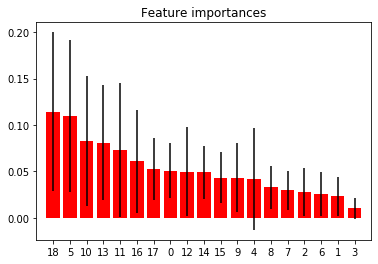

In [59]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(featureMatrix_Independent, variableVector_Dependent)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(featureMatrix_Independent.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(featureMatrix_Independent.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(featureMatrix_Independent.shape[1]), indices)
plt.xlim([-1, featureMatrix_Independent.shape[1]])
plt.show()

PCA (Principal component analysis) je jedna od metoda za smanjivanje dimenzionalnosti prostora. Ona koristi Singular Value Decomposition i linearno smanjuje dimenzionalnost. Za vrednosti n_components 8 i 10 donosi preciznost od 87,09% i 90,32% respektivno. Promenljiva explained_variance_ratio prikazuje nivo vrednosti atributa koji su selektovani od strane algoritma za svaku od n_components.

In [60]:
# Applying PCA (feature extraction)
from sklearn.decomposition import PCA
pca = PCA(n_components = 10) 
F_train = pca.fit_transform(F_train)
F_test = pca.fit_transform(F_test)
pca.explained_variance_ratio_

array([0.2393288 , 0.12726574, 0.09998906, 0.08685933, 0.07231423,
       0.05780434, 0.05370694, 0.04443778, 0.04312351, 0.03382391])

Random Forest Classification koristi noviju verziju algoritma koji se bazira na stablima odlučivanja. 
n_estimators parametar određuje broj stabala koji se koristi u analizi, a kriterijum može biti baziran na gini indeksu ili entropiji. Rezultati za različite kombinacije su sledeći:
n_estimators = 10, criterion = 'entropy' => 90,32%
n_estimators = 10, criterion = 'gini' => 90,32%
n_estimators = 12, criterion = 'gini' => 87,09%
n_estimators = 12, criterion = 'entropy' => 91,93%
Za oba kriterijuma ukoliko imamo više od 30 stabala preciznost predikcije se smanjuje i iznosi oko 88%.

In [61]:
# Fitting Random Forest Classification to the Training Set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', max_features = 'auto', random_state = 0)
classifier.fit(F_train, D_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

U nastavku se vrši predikcija skupa za testiranje podataka na osnovu istreniranog algoritma Random Forest klasifikatora.

In [62]:
# Predicting the Test set results
prediction = classifier.predict(F_test)

Matrica konfuzije predstavlja rezultate predikcije na test podacima. Na glavnoj dijagonali matrice nalaze se pogotci, dok su na sporednoj promašaji, a na osnovu ovih brojeva dobija se accuracy_score prikazan ispod.

In [63]:
# Creating Confusion Matrix
from sklearn.metrics import confusion_matrix
conMat = confusion_matrix(D_test, prediction)

In [64]:
conMat

array([[27,  2],
       [ 3, 30]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(D_test, prediction)

In [66]:
ac

0.9193548387096774

Preciznost algoritma je 91,93%.